
### Pulse Tube Signal

        Sean Keenan, PhD Physics  
        Quantum Memories Group, Heriot-Watt University, Edinburgh  
        2025  

In [1]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\keena\Documents\vscode")

from Function_files.addresses import Init_Directories
from Function_files.data_functions import open_csv
from Function_files.filter_functions import low_pass, make_fft, band_pass
from Function_files.plotting_class import Plotter

import os
from natsort import natsorted

plt = Plotter()
dirs = Init_Directories()

plt.dir = "C:/Users/keena/Documents/vscode/Thesis_SMK/Figures/"
plt.folder = "Chapter-3/AOM"
plt.format = 'svg'

folder = "Tools/Compressor/Signal"
path = dirs.join(dirs.code, folder)
fnames = [x for x in natsorted(os.listdir(path)) if '.CSV' in x]
data_sets = [open_csv(dirs.join(path, x), header=0) for x in fnames]

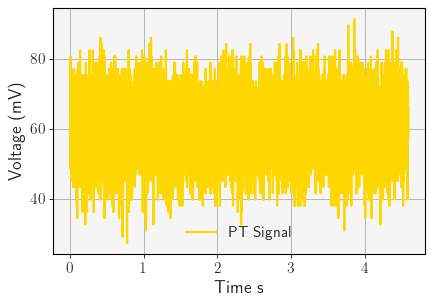

In [ ]:
plt.scale_y = 1E3
plt.fname = 'pt_signal.svg'
N = len(data_sets[-1][:,0])
fig, ax = plt.plot_scope(data_sets[-1][:,0], [data_sets[-1][:,1]], titles=['PT Signal'])

In [3]:
x = data_sets[-1][:,0]
sr = 1/(x[1]-x[0])

In [4]:
import numpy as np
from scipy.signal import fftconvolve
import matplotlib.pyplot as mp
from scipy.fftpack import fft, fftfreq, ifft
y = data_sets[-1][:,1]
fc = 3/sr
b = 0.1/sr
M = int(np.ceil((4/b)))

lpf = low_pass(M, fc)
filtered = fftconvolve(y, lpf)

X, Y = make_fft(x, y)
X_f, Y_f = make_fft(x, filtered)

In [ ]:
fig, ax = mp.subplots()
ax.plot(X[1:300], np.abs(Y)[1:300])
ax.set(xlabel='Frequency (Hz)', ylabel='Intensity (a.u.)')
fig.savefig(fname=dirs.join(path, 'pt_signal.svg'), dpi=80, format='svg', bbox_inches='tight')